# Đọc dữ liệu và phân tích

In [1]:
from pyspark.context import SparkContext
from IPython.display import Image
from pyspark.sql import SparkSession
from pyspark.sql.functions import year, expr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder \
    .appName("Stocks-price-Analysis") \
    .master("spark://spark-master:7077") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://namenode:9000") \
    .getOrCreate()

print(spark.version)

25/10/25 03:46:17 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


3.1.1


In [3]:
df_ACB = spark.read.csv("hdfs://namenode:9000/datack/ACB.csv", header=True, inferSchema=True)
df_BCM = spark.read.csv("hdfs://namenode:9000/datack/BCM.csv", header=True, inferSchema=True)
df_BID = spark.read.csv("hdfs://namenode:9000/datack/BID.csv", header=True, inferSchema=True)
df_CTG = spark.read.csv("hdfs://namenode:9000/datack/CTG.csv", header=True, inferSchema=True)
df_DGC = spark.read.csv("hdfs://namenode:9000/datack/DGC.csv", header=True, inferSchema=True)
df_FPT = spark.read.csv("hdfs://namenode:9000/datack/FPT.csv", header=True, inferSchema=True)

In [4]:
df_ACBmean = df_ACB.withColumn("mean", expr('(high+low)/2'))
df_BCMmean = df_BCM.withColumn("mean", expr('(high+low)/2'))
df_BIDmean = df_BID.withColumn("mean", expr('(high+low)/2'))
df_CTGmean = df_CTG.withColumn("mean", expr('(high+low)/2'))
df_DGCmean = df_DGC.withColumn("mean", expr('(high+low)/2'))
df_FPTmean = df_FPT.withColumn("mean", expr('(high+low)/2'))

In [5]:
df_ACBmean = df_ACBmean.toPandas()
df_BCMmean = df_BCMmean.toPandas()         
df_BIDmean = df_BIDmean.toPandas()
df_CTGmean = df_CTGmean.toPandas()
df_DGCmean = df_DGCmean.toPandas()
df_FPTmean = df_FPTmean.toPandas()

<Axes: xlabel='time'>

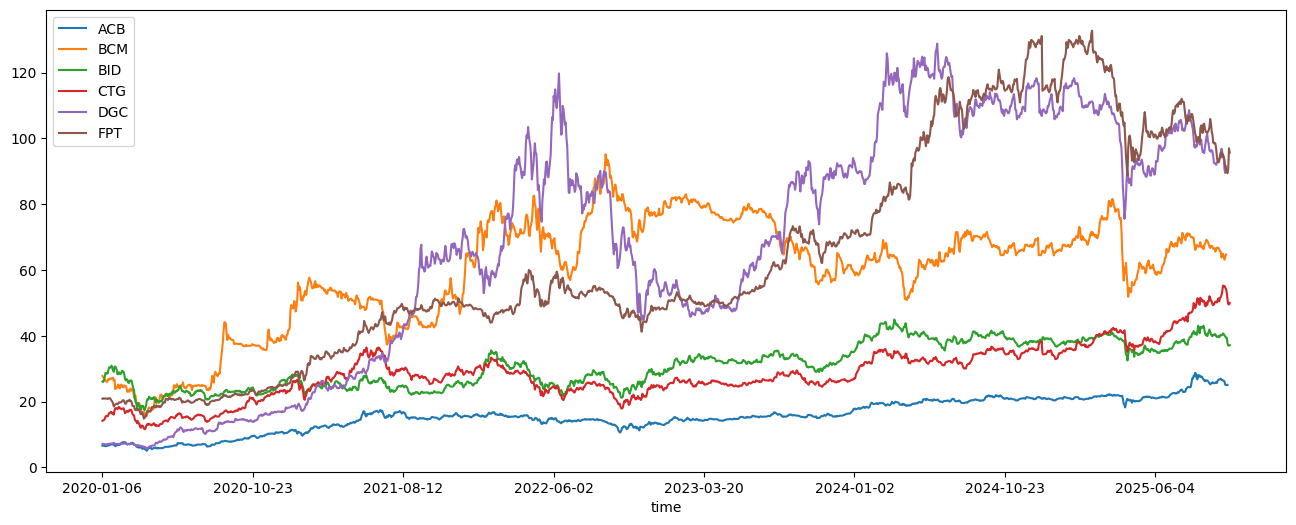

In [6]:
ax = df_ACBmean.plot(x='time', y= 'mean', label='ACB', figsize=(16,6))
ax = df_BCMmean.plot(ax=ax, x= 'time', y= 'mean',label='BCM')
ax = df_BIDmean.plot(ax=ax, x= 'time', y= 'mean',label='BID')
ax = df_CTGmean.plot(ax=ax, x= 'time', y= 'mean',label='CTG')
ax = df_DGCmean.plot(ax=ax, x= 'time', y= 'mean',label='DGC')
df_FPTmean.plot(ax=ax, x= 'time', y= 'mean',label='FPT')

In [7]:
df_ACBmean['change']= (df_ACBmean['close']/df_ACBmean['close'].shift(1)) - 1 
df_BCMmean['change']= (df_BCMmean['close']/df_BCMmean['close'].shift(1)) - 1 
df_BIDmean['change']= (df_BIDmean['close']/df_BIDmean['close'].shift(1)) - 1

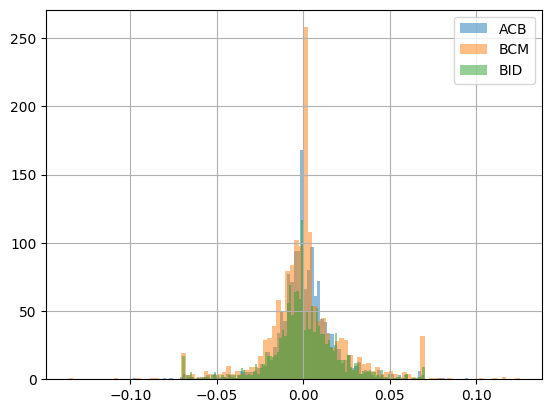

In [8]:
df_ACBmean['change'].hist(bins=100, label='ACB', alpha=0.5)
df_BCMmean['change'].hist(bins=100, label='BCM', alpha=0.5)
df_BIDmean['change'].hist(bins=100, label='BID', alpha=0.5)
plt.legend()

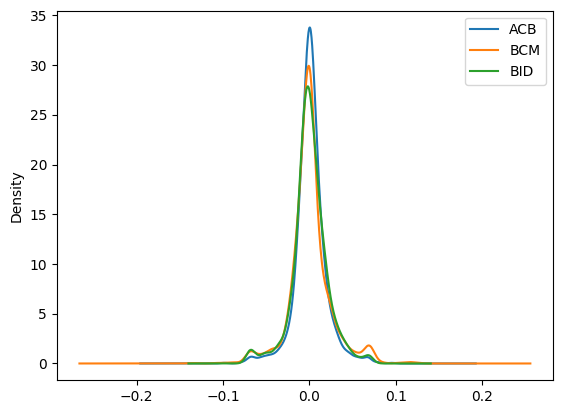

In [9]:
df_ACBmean['change'].plot(kind= 'kde', label = 'ACB')
df_BCMmean['change'].plot(kind= 'kde', label = 'BCM')
df_BIDmean['change'].plot(kind= 'kde', label = 'BID')
plt.legend()

In [10]:
spark.stop()